## Using cloud-top height and visible reflectance from GOES-16 satellite images to infer cloud area fraction $a_c$: generating plots

### Python packages

In [1]:
import numpy as np
import glob
import xarray as xr
import matplotlib.pyplot as plt
import colormaps as cmaps

### Loading data from previous outputs

In [2]:
# Base directory
base_dir = '/home/huangany/data/KloudatA/GOES-16/2020/rfv_bin_4km'

# List
file_list = sorted( glob.glob(f'{base_dir}/goes16_binned_low4km_*.nc') )

ds = xr.open_mfdataset(
    file_list,
    combine='nested',
    concat_dim='time',
    parallel=True
)
ds

<xarray.Dataset> Size: 17MB
Dimensions:         (time: 1192, cth_bin: 351)
Coordinates:
  * cth_bin         (cth_bin) float64 3kB 0.5 0.51 0.52 0.53 ... 3.98 3.99 4.0
Dimensions without coordinates: time
Data variables:
    cth_bins        (time, cth_bin) float64 3MB dask.array<chunksize=(1, 351), meta=np.ndarray>
    rfv_sum         (time, cth_bin) float64 3MB dask.array<chunksize=(1, 351), meta=np.ndarray>
    bin_count       (time, cth_bin) int64 3MB dask.array<chunksize=(1, 351), meta=np.ndarray>
    rfv_nrm         (time, cth_bin) float64 3MB dask.array<chunksize=(1, 351), meta=np.ndarray>
    rfv_acc         (time, cth_bin) float64 3MB dask.array<chunksize=(1, 351), meta=np.ndarray>
    valid_fraction  (time) float64 10kB 100.0 100.0 100.0 ... 100.0 100.0 100.0
    total_pixels    (time) int64 10kB 77959 80084 79593 ... 96064 83280 40731
    valid_pixels    (time) int64 10kB 77959 80084 79593 ... 96064 83280 40731
    avg_sza         (time) float64 10kB 87.3 83.2 79.15 ... 81.09 85.43 89.79
Attributes:
    source_file:  G16V04.0.ATOMIC.2020015.1040.PX.02K.NC
    YYYYDOY:      2020015
    HHMM:         1040

In [3]:
rfv_nrm = ds['rfv_nrm'].values
rfv_acc = ds['rfv_acc'].values
cth_bin = ds['cth_bin'].values
vf = ds['valid_fraction'].values

### Plot!!!

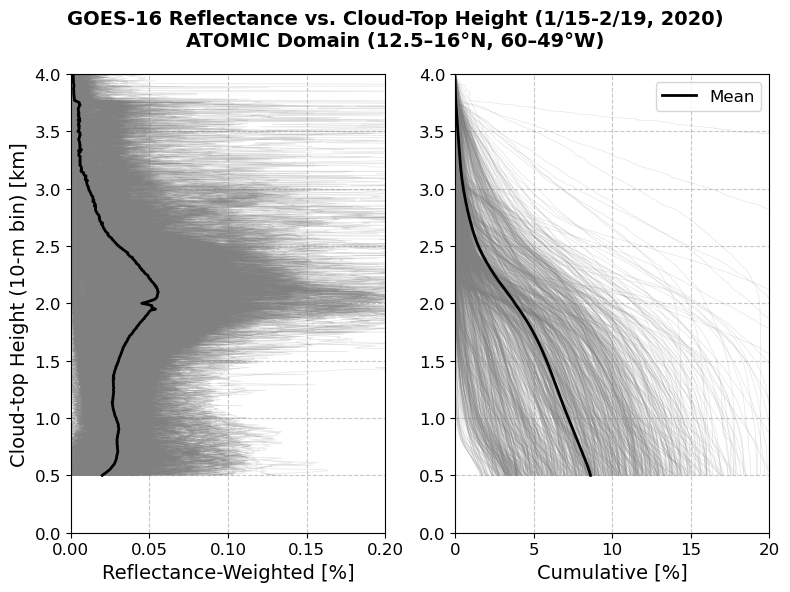

In [4]:
plt.figure(figsize=(8, 6))  # a slightly taller figure to accommodate two panels

# ─── First subplot: normalized reflectance vs. cth_bin ────────────────────────
ax1 = plt.subplot(1, 2, 1)
for t in range(rfv_nrm.shape[0]):
    ax1.plot(100*rfv_nrm[t, :], cth_bin, color='gray', alpha=0.2, linewidth=0.5)
# Overplot the time‐mean profile in black
mean_rfv = np.nanmean(rfv_nrm, axis=0)
ax1.plot(100*mean_rfv, cth_bin, color='black', linewidth=2)

ax1.set_xlim(0, 0.2)
ax1.set_ylim(0, 4)
#ax1.set_xticks(np.arange(0, 0.021, 0.005))
#ax1.set_yticks(np.arange(0, 11, 2))
ax1.set_ylabel('Cloud-top Height (10-m bin) [km]', fontsize=14)
ax1.set_xlabel('Reflectance-Weighted [%]', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)

# ─── Second subplot: accumulated reflectance vs. cth_bin ──────────────────────
ax2 = plt.subplot(1, 2, 2)
for t in range(rfv_acc.shape[0]):
    ax2.plot(100*rfv_acc[t, :], cth_bin, color='gray', alpha=0.2, linewidth=0.5)
# Overplot the time‐mean accumulated profile
mean_acc = np.nanmean(rfv_acc, axis=0)
ax2.plot(100*mean_acc, cth_bin, color='black', linewidth=2, label='Mean')

ax2.set_xlim(0, 20)
ax2.set_ylim(0, 4)
#ax2.set_xticks(np.arange(0, 0.51, 0.1))
#ax2.set_yticks(np.arange(0, 11, 2))
#ax2.set_ylabel('Cloud-top-height bin (km)', fontsize=14)
ax2.set_xlabel('Cumulative [%]', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper right', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.suptitle('GOES-16 Reflectance vs. Cloud-Top Height (1/15-2/19, 2020)\n' \
            'ATOMIC Domain (12.5–16°N, 60–49°W)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Mean fraction at 500-m:  8.62 %
Mean fraction at 700-m:  8.1 %


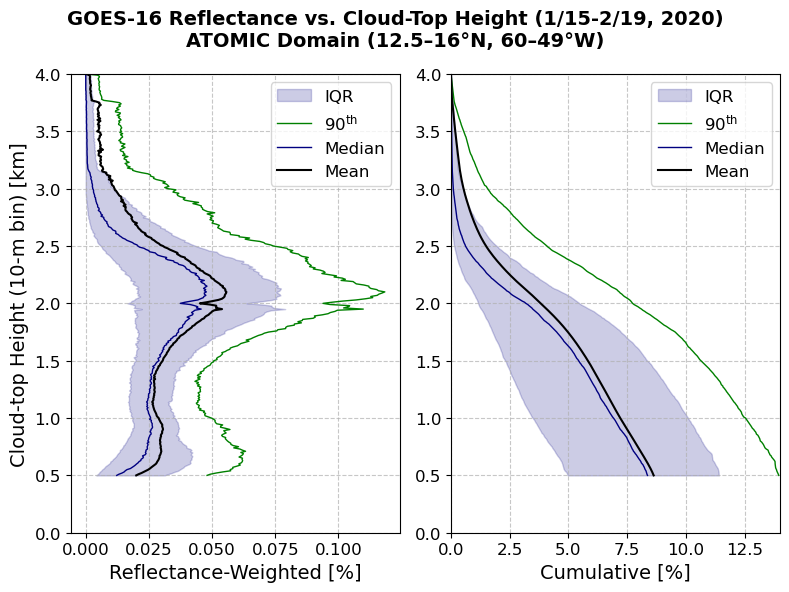

In [5]:
plt.figure(figsize=(8, 6))  # a slightly taller figure to accommodate two panels

# ─── First subplot: normalized reflectance vs. cth_bin ────────────────────────
ax1 = plt.subplot(1, 2, 1)

# Calculate 25th and 75th percentiles along the time dimension
rfv_p25 = np.nanpercentile(rfv_nrm, 25, axis=0)
rfv_p50 = np.nanpercentile(rfv_nrm, 50, axis=0)
rfv_p75 = np.nanpercentile(rfv_nrm, 75, axis=0)
rfv_p99 = np.nanpercentile(rfv_nrm, 90, axis=0)

# Fill between the 25th and 75th percentiles
ax1.fill_betweenx(cth_bin, 100*rfv_p25, 100*rfv_p75, color='navy', alpha=0.2, label='IQR', linewidth=1)

# Overplot the time‐mean profile in black
mean_rfv = np.nanmean(rfv_nrm, axis=0)
ax1.plot(100*rfv_p99, cth_bin, color='green', linewidth=1, label=r'$90^{\mathrm{th}}$')
ax1.plot(100*rfv_p50, cth_bin, color='navy', linewidth=1, label='Median')
ax1.plot(100*mean_rfv, cth_bin, color='black', linewidth=1.5, label='Mean')

# ax1.set_xlim(0, 0.07)
ax1.set_ylim(0, 4)
ax1.set_ylabel('Cloud-top Height (10-m bin) [km]', fontsize=14)
ax1.set_xlabel('Reflectance-Weighted [%]', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(loc='upper right', fontsize=12)

# ─── Second subplot: accumulated reflectance vs. cth_bin ──────────────────────
ax2 = plt.subplot(1, 2, 2)

# Calculate 25th and 75th percentiles for accumulated reflectance
acc_p25 = np.nanpercentile(rfv_acc, 25, axis=0)
acc_p50 = np.nanpercentile(rfv_acc, 50, axis=0)
acc_p75 = np.nanpercentile(rfv_acc, 75, axis=0)
acc_p99 = np.nanpercentile(rfv_acc, 90, axis=0)

# Fill between the 25th and 75th percentiles
ax2.fill_betweenx(cth_bin, 100*acc_p25, 100*acc_p75, color='navy', alpha=0.2, label='IQR', linewidth=1)

# Overplot the time‐mean accumulated profile
mean_acc = np.nanmean(rfv_acc, axis=0)
cbh700 = np.argmin(np.abs(cth_bin - 0.7))
print('Mean fraction at 500-m: ', np.round(mean_acc[0]*100, 2), '%')
print('Mean fraction at 700-m: ', np.round(mean_acc[cbh700]*100, 2), '%')
ax2.plot(100*acc_p99, cth_bin, color='green', linewidth=1, label=r'$90^{\mathrm{th}}$')
ax2.plot(100*acc_p50, cth_bin, color='navy', linewidth=1, label='Median')
ax2.plot(100*mean_acc, cth_bin, color='black', linewidth=1.5, label='Mean')

ax2.set_xlim(0, 14)
ax2.set_ylim(0, 4)
ax2.set_xlabel('Cumulative [%]', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper right', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# ─── Title and layout ─────────────────────────────────────────────────────────
plt.suptitle('GOES-16 Reflectance vs. Cloud-Top Height (1/15-2/19, 2020)\n' \
             'ATOMIC Domain (12.5–16°N, 60–49°W)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### Functions for simple model

In [6]:
# Latent heat of vaporization of water as a function of temperature [K]
def Lv(T):
    return 2.501e6 + (Cpv - Cw) * (T - T0) # [J/kg]

# Wexler/Buck 1981 formula (with enhancement factor at standard pressure)
def es_wexler(T_C, P=1013.25):  # P in hPa
    return 1e2 * 6.1121 * (1.0007 + 3.46e-6 * P) * np.exp((17.502 * T_C) / (240.97 + T_C))

# Saturation vapor pressure calculations
def q_sat(T_C, p=101325):  # p in Pa (default = 1013.25 hPa)
    epsilon = Rd / Rv  # ratio of gas constants
    #es = es_clausius_clapeyron(T_C)
    #es = es_tetens(T_C)
    es = es_wexler(T_C)
    return (epsilon * es) / (p - (1 - epsilon) * es)

# Total water content calculation
def q_total(ae, dz, x, qs, qm, q_zcb, izcb):
    qtilde = (1 - x) * qm + x * qs

    qt = qtilde.copy()
    qt[0:izcb+1] = q_zcb  # set sub-cloud specific humidity
                          # Python is start inclusive, end exclusive, so must use izcb+1
                          # So qt[0:izcb+1] includes qt[izcb]
    for iz in range(izcb, len(qt)-1):
        if qt[iz] > qs[iz]:
            a1 = ae * dz
            Q1 = (qtilde[iz+1] + qtilde[iz]) / 2
            qt[iz+1] = ( (1-a1/2) * qt[iz] + a1*Q1 ) / (1 + a1/2)
        else:
            a2 = (1 - x) * ae * dz
            Q2 = (qm[iz+1] + qm[iz]) / 2
            qt[iz+1] = ( (1-a2/2) * qt[iz] + a2*Q2 ) / (1 + a2/2)
    return qt

def cloudflux_downward(ae, dz, x, ql, qm, qs, Ft, izcb, izct):
    Q = x * ae * ql / (qs - qm) * dz
    Fcld = Ft.copy()
    Fcld[:izct] = np.nan
    for iz in range(izct, izcb-1, -1):
        Fcld[iz] = (Ft[iz] - Ft[iz+1] + Fcld[iz+1] * (1 + Q[iz+1]/2)) / (1 - Q[iz]/2)
    return Fcld

### Ronald Brown Data

In [7]:
# Data
path = "/data/KloudatA/ATOMIC/RonBrown"
dsr  = xr.open_dataset(f"{path}/RonBrown_radiosondes.nc")
dss  = xr.open_dataset(f"{path}/RonBrown_10min_flux.nc")

### Variables

In [8]:
# Variables from datasets
# Mean profiles over soundings
z    = dsr['alt'].values       # shape (alt,) [m]
tam  = dsr['ta'].mean(dim='sounding', skipna=True).values
# thm  = dsr['theta'].mean(dim='sounding', skipna=True).values
qm   = dsr['q'].mean(dim='sounding', skipna=True).values
pm   = dsr['p'].mean(dim='sounding', skipna=True).values

# Mean fluxes over 10-min intervals
# lhf  = dss['hl_bulk'].values.squeeze()  # surface downward latent heat flux [W/m^2]
pr   = dss['prate'].values.squeeze()    # precipitation rate [mm/hr]
# ep   = dss['evap'].values.squeeze()    # evaporation rate [mm/hr]
rho  = dss['rhoair'].values.squeeze()  # surface air density [kg/m^3]
tair = dss['tair_ship'].values.squeeze()  # surface air temperature [degC]

# Constants
Cpv     = 1870   # Specific heat capacity of water vapor at constant pressure [J/kg/K] Bolton
Cw      = 4190   # Specific heat capacity of liquid water at constant pressure [J/kg/K] Bolton
Rv      = 461.5  # Gas constant for water vapor [J/kg/K]
Rd      = 287.04 # Gas constant for dry air [J/kg/K]
T0      = 273.15 # Reference temperature [K]

zi      = 3000   # Inversion height [m]
ztop    = 4000   # Top of trade cumulus cloud layer [m]
divg    = 1e-6   # Divergence of vertical velocity [s^-1]
rho_sfc = 1.16   # Surface density [kg/m^3] obtained from surface data instead

Ecb     = 145    # Evaporation rate at cloud base [W/m^2]

# Variables derived from mean profiles
qs   = q_sat(tam - T0, pm)  # saturation specific humidity
dz   = (z[1] - z[0])        # vertical grid spacing in m
# dqdz = np.gradient(qm, dz)  # vertical gradient of specific humidity (central difference)
dqdz = np.diff(qm) / dz     #                                        (forward difference)

Lv_m = Lv(np.nanmean(tam[z <= ztop])) # latent heat of vaporization avg lower than ztop [2.47e+6 J/kg]

rho_sfc1 = np.nanmean(rho)  # surface air density [kg/m^3]
rho_L = np.nanmean(pm[z <= ztop]) / (Rd * np.nanmean(tam[z <= ztop])) * Lv_m # Density times Lv [kg/m^3 J/kg]

### Large-scale terms

In [10]:
# Calculations: large-scale advections (prescribed, i.e., the A term)
# Vertical velocity w(z) = -divg * z [m/s]
# Vertical moisture advection (subsidence drying: -w(z) * dq/dz)
w_dqdz = -( -divg * np.minimum(z[:-1], zi) ) * dqdz  # [1/s] # use z if dqdz is central difference

# Horizontal moisture advection (moisture convergence: ui * dq/dxi)
u_dqdx = -1.7e-8 * np.maximum(0, (ztop - z[:-1])/ztop)

ls_adv = w_dqdz + u_dqdx

### Use $\chi$ and $\alpha+\epsilon$ to infer precipitation at surface

In [11]:
# Calculations: moisture budget for multiple cases (α+ϵ = from 3.5 to 0.605982 1/km)
Fcb = Ecb / rho_L - np.nanmean(pr) / 3600 # [kg/m^s]
# Fcb = Ecb / rho_L - 0.01/3600 # [kg/m^s]
zcb = 700
x_range = np.linspace(0, 1.0, 101)
ae_range = 1e-3 * np.linspace(0.5, 5, 101)

pr_pred = np.zeros((len(x_range), len(ae_range)))
cth_pred = np.zeros((len(x_range), len(ae_range)))
ac = np.zeros((len(x_range), len(ae_range)))
ec = np.zeros((len(x_range), len(ae_range)))
for ix in range(len(x_range)):
    for iae in range(len(ae_range)):
        print(f"Case with α+ϵ={ae_range[iae]*1e+3} 1/km and x={x_range[ix]:.2f}")
        ae = ae_range[iae]
        x = x_range[ix]

        izcb = np.where(z >= zcb)[0][0]  # find index where height is greater than or equal to zcb
        q_zcb = qs[izcb]  # specific humidity at cloud base height

        # Integrate total flux balancing subsidence drying and horizontal advection from cloud base
        Ft = qm.copy()
        Ft[1:izcb] = np.nan
        ls_adv_cumsum = np.concatenate( ([0], np.cumsum(ls_adv[izcb:] * dz)) )
        Ft[izcb:] = Fcb + ls_adv_cumsum

        # Calculate total water content
        qt = q_total(ae, dz, x, qs, qm, q_zcb, izcb)
        ql = np.maximum(qt - qs, 0.0)           # cloud liquid water content

        # Find the cloud-top height where ql goes to zero above the cloud base
        izct = np.where(ql[izcb+1:] == 0)[0][0] + izcb

        # Calculations: cloud fluxes for control case
        Fcld = cloudflux_downward(ae, dz, x, ql, qm, qs, Ft, izcb, izct)
        Fpr = Fcld - Ft # Precipitation flux must be zero above cloud top

        pr_pred[ix, iae] = Fpr[izcb]
        cth_pred[ix, iae] = z[izct]
        ac[ix, iae] = x * ae       # autoconversion coefficient
        ec[ix, iae] = (1 - x) * ae # entrainment coefficient

Case with α+ϵ=0.5 1/km and x=0.00
Case with α+ϵ=0.545 1/km and x=0.00
Case with α+ϵ=0.5900000000000001 1/km and x=0.00
Case with α+ϵ=0.635 1/km and x=0.00
Case with α+ϵ=0.6799999999999999 1/km and x=0.00
Case with α+ϵ=0.725 1/km and x=0.00
Case with α+ϵ=0.77 1/km and x=0.00
Case with α+ϵ=0.815 1/km and x=0.00
Case with α+ϵ=0.86 1/km and x=0.00
Case with α+ϵ=0.9050000000000001 1/km and x=0.00
Case with α+ϵ=0.95 1/km and x=0.00
Case with α+ϵ=0.995 1/km and x=0.00
Case with α+ϵ=1.04 1/km and x=0.00
Case with α+ϵ=1.085 1/km and x=0.00
Case with α+ϵ=1.13 1/km and x=0.00
Case with α+ϵ=1.1749999999999998 1/km and x=0.00
Case with α+ϵ=1.22 1/km and x=0.00
Case with α+ϵ=1.2650000000000001 1/km and x=0.00
Case with α+ϵ=1.3100000000000003 1/km and x=0.00
Case with α+ϵ=1.355 1/km and x=0.00
Case with α+ϵ=1.4 1/km and x=0.00
Case with α+ϵ=1.4449999999999998 1/km and x=0.00
Case with α+ϵ=1.49 1/km and x=0.00
Case with α+ϵ=1.535 1/km and x=0.00
Case with α+ϵ=1.58 1/km and x=0.00
Case with α+ϵ=1.62500

In [93]:
# Only keep pr_pred > 0 and pr_pred <= 250 Wm^-2
# prwm2 = rho_sfc * Lv_m * pr_pred
prwm2 = rho_L * pr_pred
print([np.nanmin(prwm2), np.nanmax(prwm2)])
# print([np.nanmin(rho_sfc1 * Lv_m * pr_pred), np.nanmax(rho_sfc1 * Lv_m * pr_pred)])

prwm2keep = np.where((prwm2 > 0) & (prwm2 <= 250), prwm2, np.nan)
print([np.nanmin(prwm2keep), np.nanmax(prwm2keep)])

wm2_levels = np.arange(0, 105, 5)

# Only make cth_pred > 3500 and < 700 NaN
cthkeep = np.where((cth_pred <= 3500) & (cth_pred >= 700), cth_pred, np.nan)

print([np.nanmin(cthkeep), np.nanmax(cthkeep)])
cth_levels = np.arange(700, 3500+100, 100)

[0.0, 1.2623075729882053e+19]
[1.765821995689941e-05, 198.0773211656683]
[700.0, 3330.0]


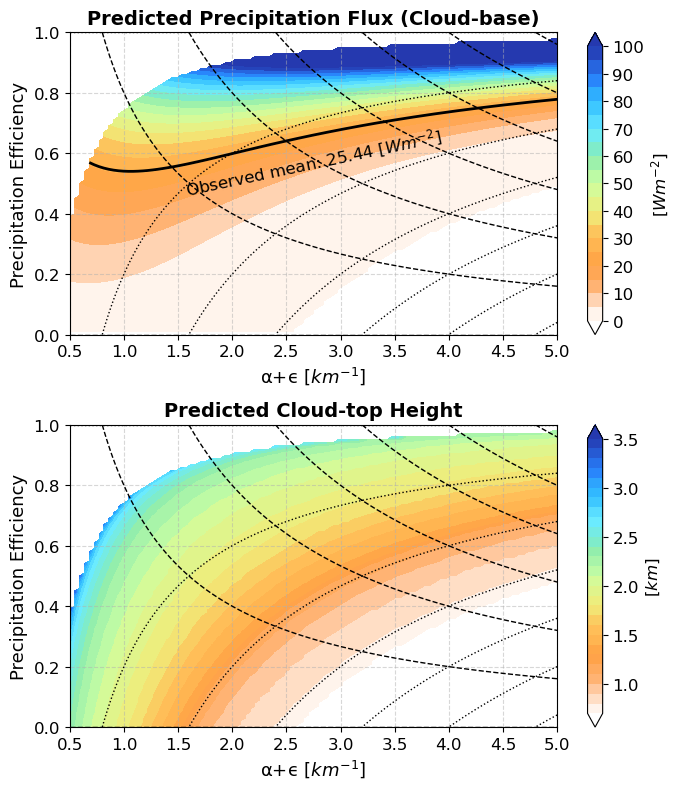

In [298]:
plt.figure(figsize=(7, 8))
plt.subplot(2,1,1)
# plt.contourf(ae_range * 1e+3, x_range, prlog, levels=log2_levels, 
#              cmap='terrain_r', extend='both')
plt.contourf(ae_range * 1e+3, x_range, prwm2keep, levels=wm2_levels, 
             cmap=cmaps.cmp_haxby_r, extend='both')
cb = plt.colorbar()
cb.set_label(r'[$Wm^{-2}$]', fontsize=12)
# cb.set_ticks(np.arange(-10, 11, 2))
# cb.set_ticklabels([f'$2^{{{int(tick)}}}$' for tick in np.arange(-10, 11, 2)], fontsize=12)
cb.set_ticks(np.arange(0, 105, 10))
cb.set_ticklabels(np.arange(0, 105, 10), fontsize=12)

plt.contour(ae_range * 1e+3, x_range, prwm2keep, 
            levels=[rho_sfc*Lv_m*np.nanmean(pr)/3600], colors='k',
            linestyles='-', linewidths=2)
# plt.contour(ae_range * 1e+3, x_range, prwm2keep, 
#             levels=[rho_L*np.nanmean(pr)/3600], colors='k',
#             linestyles='-', linewidths=2)

plt.contour(ae_range * 1e+3, x_range, ac * 1e+3, colors='k',
            linestyles='--', linewidths=1)
plt.contour(ae_range * 1e+3, x_range, ec * 1e+3, colors='k',
            linestyles=':', linewidths=1)

plt.xlabel(r'α+ϵ [$km^{-1}$]', fontsize=13)
plt.ylabel('Precipitation Efficiency', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Predicted Precipitation Flux (Cloud-base)', fontsize=14, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)

# plt.text(0.5, 0.57, f'Mean obs precip: {np.nanmean(pr)*24:.2f} [mm/day]',
#          transform=plt.gca().transAxes,
#          fontsize=12, ha='center', va='center',
#          rotation=12, color='k')
plt.text(0.5, 0.57, f'Observed mean: {rho_sfc*Lv_m*np.nanmean(pr)/3600:.2f} [$Wm^{{-2}}$]',
         transform=plt.gca().transAxes,
         fontsize=12, ha='center', va='center',
         rotation=12, color='k')
# plt.text(0.5, 0.57, f'Observed mean: {rho_L*np.nanmean(pr)/3600:.2f} [$Wm^{{-2}}$]',
#          transform=plt.gca().transAxes,
#          fontsize=12, ha='center', va='center',
#          rotation=12, color='k')

plt.subplot(2,1,2)
plt.contourf(ae_range * 1e+3, x_range, cthkeep, levels=cth_levels, 
             cmap=cmaps.cmp_haxby_r, extend='both')
cb = plt.colorbar()
cb.set_label(f'[$km$]', fontsize=12)
cb.set_ticks(np.arange(1000, 3500+100, 500))
cb.set_ticklabels(np.arange(1000, 3500+100, 500)/1000, fontsize=12)

plt.contour(ae_range * 1e+3, x_range, cthkeep, levels=[np.log2(np.nanmean(pr)*24)], colors='k',
            linestyles='-', linewidths=2)

plt.contour(ae_range * 1e+3, x_range, ac * 1e+3, colors='k',
            linestyles='--', linewidths=1)
plt.contour(ae_range * 1e+3, x_range, ec * 1e+3, colors='k',
            linestyles=':', linewidths=1)

plt.xlabel(r'α+ϵ [$km^{-1}$]', fontsize=13)
plt.ylabel('Precipitation Efficiency', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Predicted Cloud-top Height', fontsize=14, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)

plt.tight_layout()

### Case $\chi = $ ?

In [234]:
# Calculations: moisture budget for multiple cases (α+ϵ = from 3.5 to 0.605982 1/km)
# ==SAME== Fcb = Ecb / rho_L - np.nanmean(pr) / 3600 # [kg/m^s]
Fcb = Ecb / rho_L - np.nanmean(pr) / 3600 # [kg/m^s]
# ==SAME== zcb = 700
x = 0.5
# ==SAME== ae_range = 1e-3 * np.linspace(0.5, 5, 101)

pr1_pred = np.zeros(len(ae_range))
cth1_pred = np.zeros(len(ae_range))
ac1 = np.zeros(len(ae_range))
ec1 = np.zeros(len(ae_range))
for iae in range(len(ae_range)):
    print(f"Case with α+ϵ={ae_range[iae]*1e+3} 1/km and x={x:.2f}")
    ae = ae_range[iae]

    izcb = np.where(z >= zcb)[0][0]  # find index where height is greater than or equal to zcb
    q_zcb = qs[izcb]  # specific humidity at cloud base height

    # Integrate total flux balancing subsidence drying and horizontal advection from cloud base
    Ft = qm.copy()
    Ft[1:izcb] = np.nan
    ls_adv_cumsum = np.concatenate( ([0], np.cumsum(ls_adv[izcb:] * dz)) )
    Ft[izcb:] = Fcb + ls_adv_cumsum

    # Calculate total water content
    qt = q_total(ae, dz, x, qs, qm, q_zcb, izcb)
    ql = np.maximum(qt - qs, 0.0)           # cloud liquid water content

    # Find the cloud-top height where ql goes to zero above the cloud base
    izct = np.where(ql[izcb+1:] == 0)[0][0] + izcb

    # Calculations: cloud fluxes for control case
    Fcld = cloudflux_downward(ae, dz, x, ql, qm, qs, Ft, izcb, izct)
    Fpr = Fcld - Ft # Precipitation flux must be zero above cloud top

    pr1_pred[iae] = Fpr[izcb]
    cth1_pred[iae] = z[izct]
    ac1[iae] = x * ae       # autoconversion coefficient
    ec1[iae] = (1 - x) * ae # entrainment coefficient

Case with α+ϵ=0.5 1/km and x=0.50
Case with α+ϵ=0.545 1/km and x=0.50
Case with α+ϵ=0.5900000000000001 1/km and x=0.50
Case with α+ϵ=0.635 1/km and x=0.50
Case with α+ϵ=0.6799999999999999 1/km and x=0.50
Case with α+ϵ=0.725 1/km and x=0.50
Case with α+ϵ=0.77 1/km and x=0.50
Case with α+ϵ=0.815 1/km and x=0.50
Case with α+ϵ=0.86 1/km and x=0.50
Case with α+ϵ=0.9050000000000001 1/km and x=0.50
Case with α+ϵ=0.95 1/km and x=0.50
Case with α+ϵ=0.995 1/km and x=0.50
Case with α+ϵ=1.04 1/km and x=0.50
Case with α+ϵ=1.085 1/km and x=0.50
Case with α+ϵ=1.13 1/km and x=0.50
Case with α+ϵ=1.1749999999999998 1/km and x=0.50
Case with α+ϵ=1.22 1/km and x=0.50
Case with α+ϵ=1.2650000000000001 1/km and x=0.50
Case with α+ϵ=1.3100000000000003 1/km and x=0.50
Case with α+ϵ=1.355 1/km and x=0.50
Case with α+ϵ=1.4 1/km and x=0.50
Case with α+ϵ=1.4449999999999998 1/km and x=0.50
Case with α+ϵ=1.49 1/km and x=0.50
Case with α+ϵ=1.535 1/km and x=0.50
Case with α+ϵ=1.58 1/km and x=0.50
Case with α+ϵ=1.62500

In [235]:
idtop1 = np.where(cth1_pred<4000)[0][0]

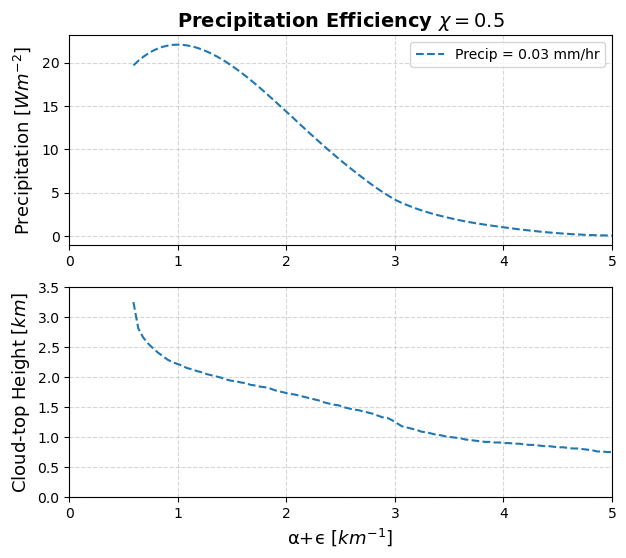

In [236]:
plt.figure(figsize=(7, 6))
plt.subplot(2, 1, 1)
plt.plot(ae_range[idtop1:]*1e+3, rho_L * pr1_pred[idtop1:], linestyle='--', label=f'Precip = {np.round(np.nanmean(pr),2)} mm/hr')

plt.xlim(0, 5)
# plt.ylim(0, 25)
plt.ylabel(r'Precipitation [$Wm^{-2}$]', fontsize=13)
plt.title(f'Precipitation Efficiency $\chi={x}$', fontsize=14, fontweight='bold')

plt.grid(linestyle='--', alpha=0.5)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(ae_range[idtop1:]*1e+3, cth1_pred[idtop1:]/1000, linestyle='--')

plt.xlim(0, 5)
plt.ylim(0, 3.5)
plt.xlabel(r'α+ϵ [$km^{-1}$]', fontsize=13)
plt.ylabel(r'Cloud-top Height [$km$]', fontsize=13)

plt.grid(linestyle='--', alpha=0.5)

In [237]:
# Find closest bin index for each predicted CTH
# indices = np.abs(cth_bin[:, None]*1000 - cth1_pred).argmin(axis=0)

# Get the matching mean_acc values
# matched_mean_acc = mean_acc[indices]
# matched_mean_acc

matched_mean_acc1 = np.interp(cth1_pred[idtop1:], cth_bin*1000, mean_acc)
matched_mean_acc1

array([0.00322971, 0.0080333 , 0.0108263 , 0.01318258, 0.01553828,
       0.01803586, 0.02046251, 0.02310332, 0.02499123, 0.02647606,
       0.02800995, 0.03014002, 0.03123111, 0.03289239, 0.03400025,
       0.03564528, 0.03670907, 0.03768923, 0.03863111, 0.04017966,
       0.04122812, 0.04172842, 0.04271463, 0.04320056, 0.04461769,
       0.0450766 , 0.04597815, 0.04641827, 0.047283  , 0.04853654,
       0.04934315, 0.0501304 , 0.05089276, 0.05126428, 0.0519968 ,
       0.05271506, 0.05341408, 0.05409886, 0.05476635, 0.05574964,
       0.05639101, 0.05702195, 0.05733259, 0.05825032, 0.0588496 ,
       0.0594377 , 0.05972512, 0.06029677, 0.06085835, 0.06141246,
       0.06222953, 0.0630438 , 0.06331421, 0.06439886, 0.065761  ,
       0.0671134 , 0.06764872, 0.06817765, 0.0687082 , 0.06951087,
       0.06978075, 0.07032618, 0.0708802 , 0.07115997, 0.07172459,
       0.07201315, 0.07230332, 0.07259535, 0.07318714, 0.07348764,
       0.07379088, 0.07409298, 0.07439667, 0.07439667, 0.07470

Max height: 3250.0 m
Min height: 750.0 m


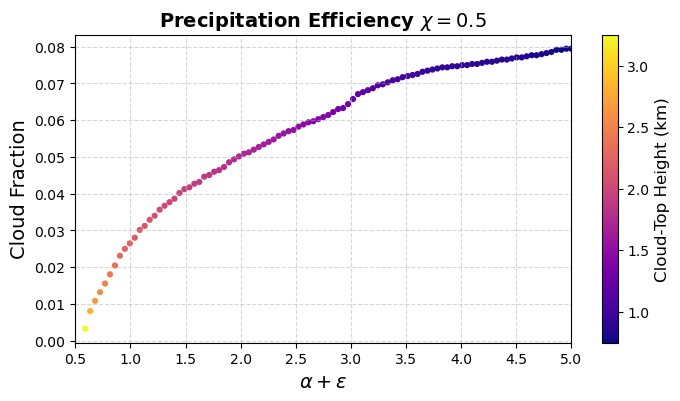

In [238]:
plt.figure(figsize=(8, 4))

sc = plt.scatter(ae_range[idtop1:]*1000, matched_mean_acc1,
    s=20,                 # marker size
    c=cth1_pred[idtop1:]/1000, # color by cth value
    cmap='plasma',       # colormap (you can try 'plasma', 'coolwarm', etc.)
    edgecolor='none')
print('Max height:',cth1_pred[idtop1],'m')
print('Min height:',cth1_pred[-1],'m')

plt.xlim(0.5, 5)
# plt.ylim(0, 0.085)

plt.title(f'Precipitation Efficiency $\chi = {x}$', fontsize=14, fontweight='bold')
plt.xlabel(r'$\alpha+\epsilon$', fontsize=14)
plt.ylabel(r'Cloud Fraction', fontsize=14)

plt.grid(linestyle='--', alpha=0.5)

# Add colorbar to show what the color represents
cb = plt.colorbar(sc)
cb.set_label('Cloud-Top Height (km)', fontsize=12)

plt.show()


In [294]:
(rho_L * pr1_pred[idtop1:-1] * np.diff(matched_mean_acc1)).sum()/matched_mean_acc1[-1]

14.136788316418716

### Case $\chi$ = 0~1

In [295]:
idtop = np.zeros(len(x_range))
pr_weighted_avg = np.zeros(len(x_range))
for ix in range(len(x_range)):
    idtop0 = np.where(cth_pred[ix,:]<4000)[0]
    if np.where(cth_pred[ix,:]<4000)[0].size == 0:
        idtop[ix] = np.nan
    else:
        idtop[ix] = idtop0[0]
        matched_mean_acc = np.interp(cth_pred[ix, int(idtop[ix]):], cth_bin*1000, mean_acc)
        # pr_weighted_avg[ix] = (rho_L * pr_pred[ix, int(idtop[ix]):] * matched_mean_acc).sum()
        pr_weighted_avg[ix] = (rho_L * pr_pred[ix, int(idtop[ix]):-1] * np.diff(matched_mean_acc)).sum()/matched_mean_acc[-1]
        # print('X = ', x_range[ix], '; Precip = ', np.round(pr_weighted_avg[ix],2), 'Wm^-2')


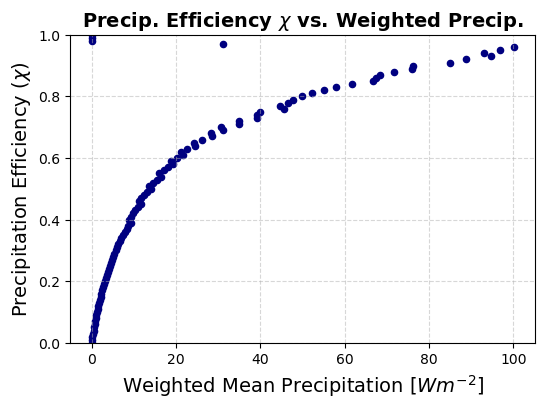

In [296]:
plt.figure(figsize=(6, 4))
plt.scatter(pr_weighted_avg, x_range, color='navy', s=20)

# plt.xlim(0, 250)
plt.ylim(0, 1)

plt.title(f'Precip. Efficiency $\chi$ vs. Weighted Precip.', fontsize=14, fontweight='bold')
plt.xlabel(r'Weighted Mean Precipitation [$Wm^{-2}$]', fontsize=14)
plt.ylabel(r'Precipitation Efficiency ($\chi$)', fontsize=14)

plt.grid(linestyle='--', alpha=0.5)

In [310]:
ipm = np.abs(pr_weighted_avg - rho_sfc*Lv_m*np.nanmean(pr)/3600).argmin()
x_range[ipm], pr_weighted_avg[ipm]

(0.66, 26.163346512491174)